In [1]:
%%bash
pip install seaborn

In [2]:
# The following script has been written with the objective of analyzing coffee market data in order to explore how
#regression modeling can help to predict coffee prices based on supply and demand variables

#Step 1: Importing and installing all necessary libraries
import pandas as pd

import numpy as np

from scipy import stats

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


#I encountered a problem just beginning when I tried to import the library in my jupyter notebook, and the error 
#“No module named seaborn” poped up. 
#After a quick google search, the error was fixed by typing the following code:

#%%bash
#pip install seaborn

#Now we can import the seaborn library
import seaborn as sns

#Step 2: Importing the Data Set
#I am using jupyter notebook for this project, so first the data set must be uploaded to jupyter, then you can import it
# You can find the data set I used here in GitHub under Files


df=pd.read_csv('data_set.csv')

#We verify the data set looks good by looking at the first five rows

df.head()



,price,production,consumption,inventories,exports
0,1.474632,93230.0596,84158.44695,15957,75943.17839
1,1.177741,101266.6844,85832.98166,19328,78299.23721
2,1.360504,98525.8992,89801.57684,16137,75168.15032
3,2.968046,91764.6216,85102.38660,14789,70716.49760
4,3.055574,93313.1940,88195.68172,9287,67869.82520


In [3]:
#Let's take a quick look at the statsitics summary of the data set
df.describe()

,price,production,consumption,inventories,exports
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.229690,114759.075057,101659.179270,16634.130435,88039.228973
std,0.923942,18302.297026,12693.294531,4566.095202,11132.168872
min,1.006439,87317.458200,84158.446950,7716.000000,67869.825200
25%,1.395052,100563.941700,90544.352115,15373.000000,79282.198090
50%,2.253127,110967.455500,98988.115450,18649.000000,88831.953170
75%,2.849402,129580.925400,112924.956550,20075.500000,96272.010740
max,4.644352,151096.987000,123908.874000,21914.000000,108566.760700


In [4]:
#Let's also take a quick look at the data types, to see what we are working with

df.dtypes


price          float64
production     float64
consumption    float64
inventories      int64
exports        float64
dtype: object

In [5]:
#Step 3: Exploring Correlation between Variables
#I want to start by exploring how the variables correlate with each other and with the price of coffee

df[['production','exports','consumption','inventories','price']].corr()

,production,exports,consumption,inventories,price
production,1.000000,0.913987,0.873467,0.586091,0.366376
exports,0.913987,1.000000,0.939016,0.600881,0.323984
consumption,0.873467,0.939016,1.000000,0.599648,0.463035
inventories,0.586091,0.600881,0.599648,1.000000,-0.159092
price,0.366376,0.323984,0.463035,-0.159092,1.000000


<AxesSubplot:xlabel='consumption', ylabel='price'>

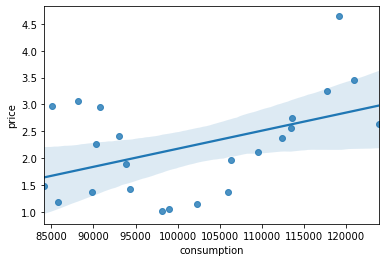

In [6]:
#The highest correlation coefficient is between price and consumption
#Let's take a look at s scatter plot between this two variables

sns.regplot(x='consumption',y='price',data=df)

In [7]:
#Let's figure the p-value for this correlation
stats.pearsonr(df['consumption'],df['price'])

(0.4630354550632886, 0.02607946716554589)

In [8]:
#Step 4: Building Simple Linear Regression Models
# Here I build a model with each predictor as simple linear regression
# Then evaluating the goodness of the fit using R-squared for cross validation

#First let's look a simple linear regression models for each predictor

y_data = df['price']

#List with predictors A

A=['production','consumption','exports','inventories']

#Empty list to store the r-squared value on training set

R_training=[]

#Empty list to store the r-squared value on trainin set

R_test=[]

#Empty list to store the values of r-squared using cross validation

R_cross_val=[]

#For loop that executes the commands through each value of the list A

for i in A:
    
    x_data= df[[i]]

    # The data is split in a training set and a testing set. The testing set will be 30% of the data

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=0)
    
    #We build the linear regression object
    lm= LinearRegression()
    
    #We train the model
    lm.fit(x_train,y_train)
    
    #Append the values of r-aquared to the corresponding list
    
    R_training.append(lm.score(x_train,y_train))
    R_test.append(lm.score(x_test,y_test))
    scores=cross_val_score(lm,x_data,y_data,cv=4)
    R_cross_val.append(np.mean(scores))
    
print(R_training)
print(R_test)
print(R_cross_val)

[0.0014364236095530947, 0.0774569586010142, 0.012527994077712545, 0.02323991946669912]
[0.006258405851815474, 0.1545215457691267, 0.038964299041345796, 0.004258033645356152]
[-1.9207466710453098, -1.584155869458114, -2.280329738473878, -1.3799852329094906]


In [9]:
#Step 5: Multiple Linear Regression

y_data = df['price']

x_data= df[['production','consumption','exports','inventories']]

# The data is split in a training set and a testing set. The testing set will be 30% of the data

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=0)

lm= LinearRegression()

lm.fit(x_train,y_train)
#Calculating the R-squared of the model in the training set
R_train=lm.score(x_train,y_train)

#Calculating the R-squared of the model in the test set
R_test=lm.score(x_test,y_test)

# Calculating the R-squared of the model using cross validation with 4 folds
scores=cross_val_score(lm,x_data,y_data,cv=4)

print('R_train =',R_train)
print('R_test =',R_test)
print('R_cross_val',np.mean(scores))

R_train = 0.5031240405070048
R_test = 0.5096414900291966
R_cross_val -0.9679216568425193


Text(0, 0.5, 'R-squared')

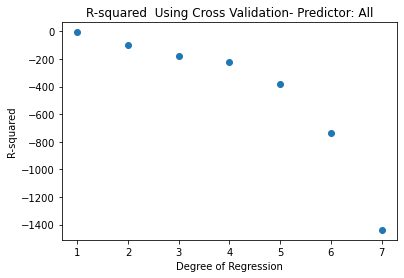

In [72]:
#Step 6: Building Polynomial Regression Models
#I used the following code to produce some r-squared metrics for polynomial models using different variables
y_data = df['price']
x_data1=df[['consumption']]
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x_data1)
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, x_poly, y_data, cv=2))
poly_cv = []
for i in range(1,8):
    poly_cv.append(create_polynomial_regression_model(i))
 
plt.scatter(range(1,8),poly_cv)
plt.title("R-squared  Using Cross Validation- Predictor: All")
plt.xlabel("Degree of Regression")
plt.ylabel("R-squared")

In [74]:
#Step 7: I want to see what the testing and training error would be for these polynomial models
y_data = df['price']

x_data= df[['consumption']]

# The data is split in a training set and a testing set. The testing set will be 30% of the data

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=0)
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=4)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
R_training =pipe.score(x_train,y_train)
R_testing =pipe.score(x_test,y_test)
print('The R-squared value for testing is:',R_testing)
print('The R-squared value for training is:', R_training)

The R-squared value for testing is: 0.4923949612734042
The R-squared value for training is: 0.5389792842959626
